In [13]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

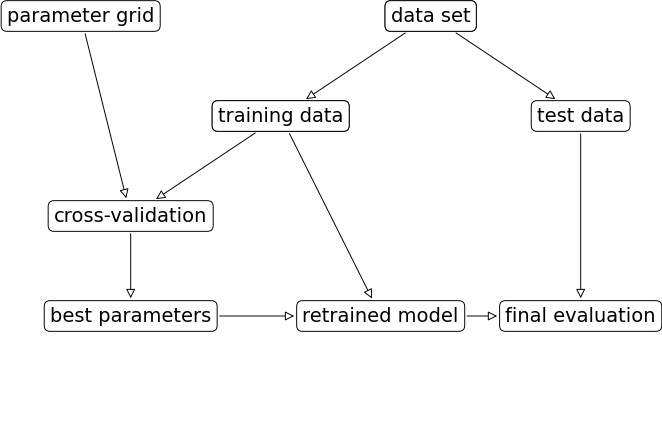

In [14]:
mglearn.plots.plot_grid_search_overview()

In [15]:
dat = pd.read_csv("/courses/EDS232/Data/demo-spotify.csv")

For GridSearchCV we need an instantiated model and parameter grid

The method considers product of the sets and evaluates each combination one by one.

The standard preparation:

In [16]:
# Define features and target
X = dat.drop(columns=['genre'])
y = dat['genre']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

rf = RandomForestClassifier()

Now we will construct our parameter grid

In [17]:
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [5, 10, 20, None],
    "max_features": ["sqrt", 9, None]
}

gs = GridSearchCV(rf, param_grid=param_grid, n_jobs=-1, return_train_score=True)

The GridSearchCV object above behaves like a classifier. We can call fit, predict or score on it.

In [18]:
# Carry out the search 
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 9, None],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True)

In [19]:
# Get the best hyperparameter values
gs.best_params_

{'max_depth': None, 'max_features': 9, 'n_estimators': 200}

It is often helpful to visualize results of all cross-validation experiments.
You can access this information using cv_results_ attribute of a fitted GridSearchCV object.

In [20]:
results = pd.DataFrame(gs.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.255623,0.025909,0.015827,0.001957,5,sqrt,10,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.872016,0.876330,...,0.874590,0.002329,48,0.889328,0.886236,0.885661,0.881355,0.883728,0.885262,0.002656
1,1.819877,0.135495,0.066427,0.010362,5,sqrt,50,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.876618,0.880644,...,0.879020,0.002391,46,0.888897,0.887459,0.889544,0.888042,0.890559,0.888900,0.001094
2,3.846426,0.480151,0.084058,0.020772,5,sqrt,100,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.885534,0.884095,...,0.881781,0.004280,42,0.892277,0.890191,0.888897,0.890703,0.892644,0.890942,0.001377
3,7.795980,0.557943,0.154767,0.023615,5,sqrt,200,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.880357,0.885246,...,0.882472,0.002925,40,0.890335,0.889472,0.889472,0.890055,0.891853,0.890238,0.000875
4,0.722940,0.163092,0.029837,0.003004,5,9,10,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.874605,0.881507,...,0.879365,0.003092,45,0.889688,0.889472,0.888897,0.891709,0.887898,0.889533,0.001252


Let's look at only the most relevant rows

In [21]:
# Select relevant columns
filtered_results = pd.DataFrame(gs.cv_results_)[
    [
        "mean_test_score",
        "param_n_estimators",   # Number of trees
        "param_max_depth",      # Max depth of trees
        "param_max_features",   # Feature selection per split
        "mean_fit_time",        # Time taken to fit the model
        "rank_test_score",      # Rank of the best score
    ]
].set_index("rank_test_score").sort_index().T

Other than searching for best hyperparameter values, GridSearchCV also fits a new model on the whole training set with the parameters that yielded the best results.
So we can conveniently call score on the test set with a fitted GridSearchCV object.

In [22]:
# Best score

# Get the test scores 


Why are best_score_ and the score above different?



Visualizing parameters as heat 

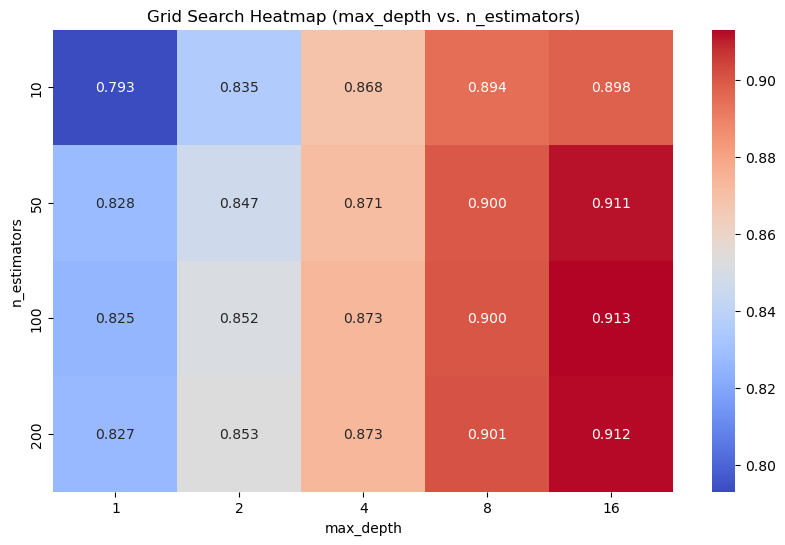

In [24]:
def display_heatmap(param_grid, model, X_train, y_train):
   
    grid_search = GridSearchCV(
        model, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="accuracy"
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Convert results to DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract parameter names dynamically
    param_x, param_y = list(param_grid.keys())

    # Reshape test scores into a 2D array for heatmap
    scores = results.pivot(index=f"param_{param_y}", columns=f"param_{param_x}", values="mean_test_score")

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="coolwarm")
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.title(f"Grid Search Heatmap ({param_x} vs. {param_y})")
    plt.show()

# Define the hyperparameter grid for max_depth vs. n_estimators
param_grid1 = {
    "max_depth": [1, 2, 4, 8, 16],
    "n_estimators": [10, 50, 100, 200] 
}


# Call the function
display_heatmap(param_grid1, rf, X_train, y_train)

A key problem with exhaustive grid search is the required number of models to evaluate grows exponentially with the dimensionally of the configuration space.

For future discussion:
sklearn.model_selection.RandomizedSearchCV
Samples configurations at random until certain budget (e.g., time) is exhausted.